In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.max_columns = 50

In [95]:
relative_path = '/raw/train.csv'
train_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


In [96]:
def load_set_data(target_month, outlier_cutoff, income_cutoff, path):
    relative_path = path
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')
        
    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': float, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]
    

    return single_month_frame

In [97]:
datag = load_set_data('April', 1 , 8000, train_path) # Check datag vs dataf and outlier cutoff input

print(np.max(datag['Annual_Income']))
print(np.min(datag['Annual_Income']))

Loading and cleaning data.


/var/folders/53/9kcv39vd6cx261y6809hh8jr0000gp/T/ipykernel_72873/3702387313.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


7455.07
7012.31


Loading and cleaning data.


/var/folders/53/9kcv39vd6cx261y6809hh8jr0000gp/T/ipykernel_72873/3702387313.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training set size for March: (8340, 1)
Testing set size for March: (2781, 1)


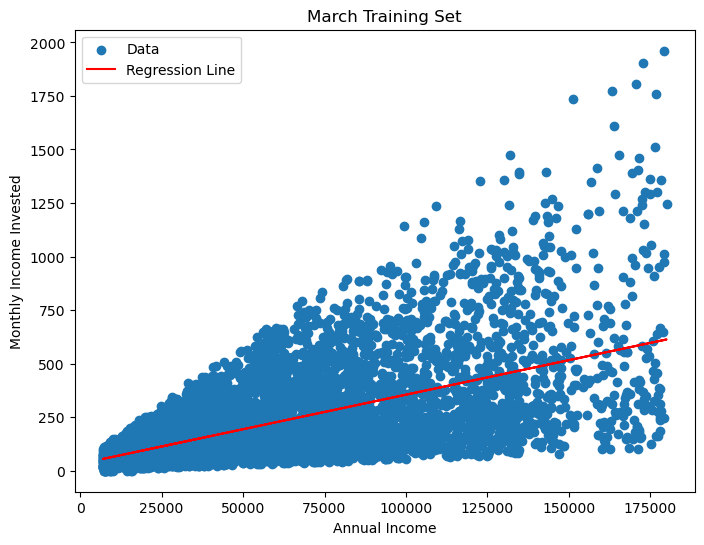

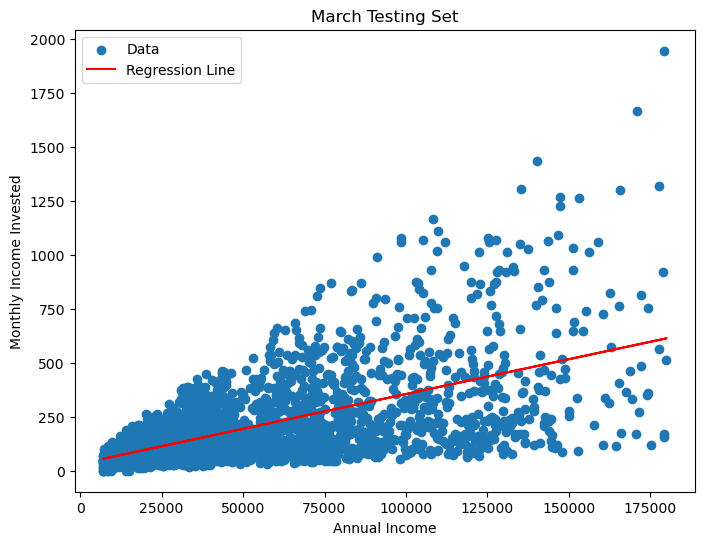

0.3868214525001398
Loading and cleaning data.


/var/folders/53/9kcv39vd6cx261y6809hh8jr0000gp/T/ipykernel_72873/3702387313.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training set size for April: (8390, 1)
Testing set size for April: (2797, 1)


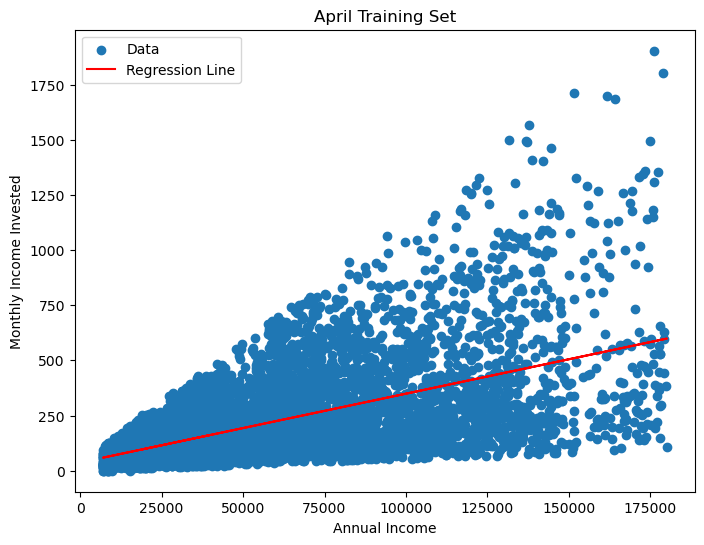

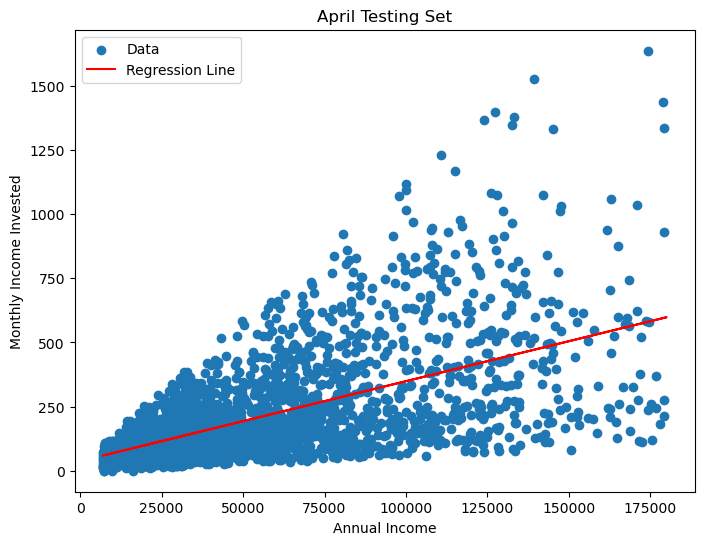

0.3713165053879728
Loading and cleaning data.


/var/folders/53/9kcv39vd6cx261y6809hh8jr0000gp/T/ipykernel_72873/3702387313.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Training set size for July: (8401, 1)
Testing set size for July: (2801, 1)


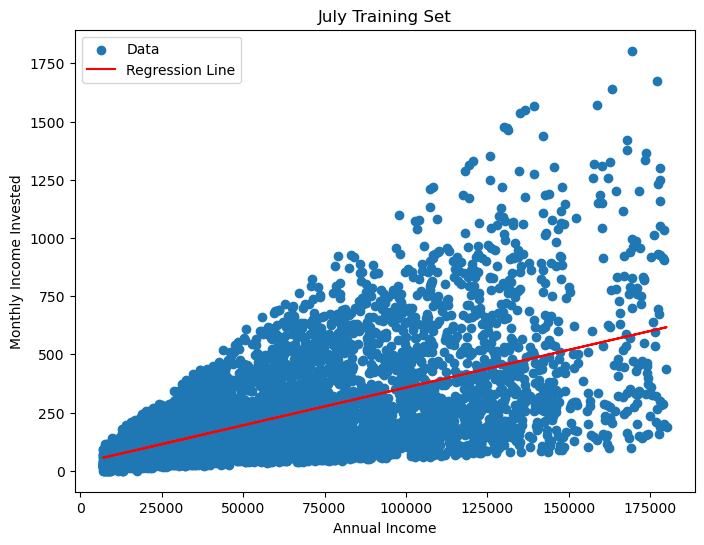

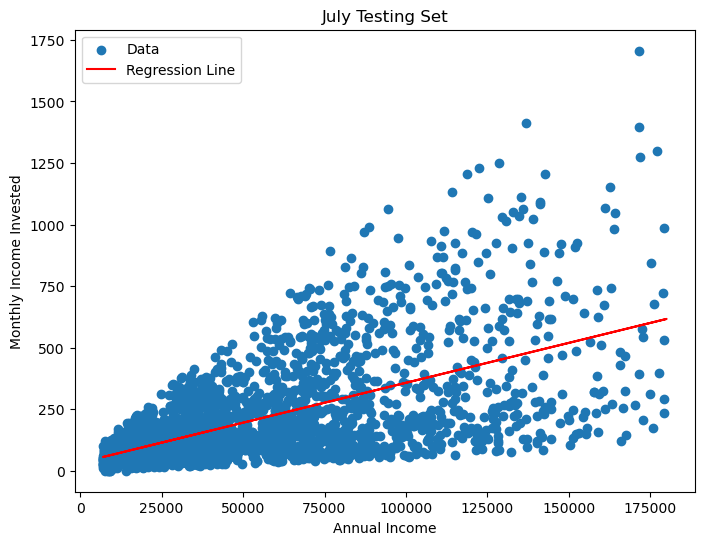

0.3880232963017388


In [98]:
# Selecting predictor
predictors = ['Annual_Income']
response_variable = 'Amount_invested_monthly'
months = [ 'March' , 'April' , 'July' ]

def build_model(): 
    for mn in months:
        dataf = load_set_data(mn , 5000 , 500000, train_path)
        if dataf is not None:
            predictor_data = dataf[predictors] #standardizing the predictors
            response_data = dataf[response_variable]
            scaler = StandardScaler()
            standardized_predictors = scaler.fit_transform(predictor_data)

            # standardized_df = pd.DataFrame(standardized_predictors, columns=predictors) # Convert the standardized predictors to a DataFrame
            # print(f"Head of the standardized predictors for {mn}:")
            # print(standardized_df.head())

            X_train, X_test, y_train, y_test = train_test_split(predictor_data, response_data, test_size=0.25, random_state=42)  # Splitting the data into training and testing sets

            print(f"Training set size for {mn}: {X_train.shape}")
            print(f"Testing set size for {mn}: {X_test.shape}")


            plt.figure(figsize=(8,6))
            plt.scatter(x=X_train, y=y_train, label= 'Data')
            plt.xlabel('Annual Income')
            plt.ylabel('Monthly Income Invested')
            plt.title(mn + ' Training Set')

            # Fitting the linear regression model
            lm = LinearRegression()
            X = dataf['Annual_Income'].values.reshape(-1, 1)  # Reshape for sklearn
            y = dataf['Amount_invested_monthly']
            lm.fit(X, y)
            plt.plot(dataf['Annual_Income'], lm.predict(X), color='red', label='Regression Line')
            plt.legend()
            plt.show()

            plt.figure(figsize=(8,6))
            plt.scatter(x=X_test, y=y_test, label= 'Data')
            plt.xlabel('Annual Income')
            plt.ylabel('Monthly Income Invested')
            plt.title(mn + ' Testing Set')
            # Fitting the linear regression model
            lm = LinearRegression()
            X_test = dataf['Annual_Income'].values.reshape(-1, 1)  # Reshape for sklearn
            y_test = dataf['Amount_invested_monthly']
            lm.fit(X_test, y_test)
            plt.plot(dataf['Annual_Income'], lm.predict(X), color='red', label='Regression Line')
            plt.legend()
            plt.show()
            print(lm.score(X_test, y_test))

build_model()

In [99]:
# Fitting the KNN model
knn = KNeighborsRegressor(n_neighbors=250)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=250)

In [100]:
# prediction accuracy rate
accuracy = knn.score(X_test, y_test)
print(accuracy)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.3889340940074473


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/neighbors/_base.py:705: RuntimeWarning: invalid value encountered in sqrt
  return tree.query(*args, **kwargs)


In [101]:
# prediction error rate
predictor_error = 1 - accuracy
print(predictor_error)

0.6110659059925527
